In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.svm import SVR
import statsmodels.api as sm
import datetime
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dữ-liệu-Lịch-sử-ACB.csv',delimiter=";")
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)
df

,Price,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-02,"11615,4","11076,6","11645,3","11016,7",12.22M,5.15%
2018-01-03,"11585,5","11615,4","11705,2","11375,9",16.89M,-0.26%
2018-01-04,"11615,4","11585,5","11645,3","11495,7",21.26M,0.26%
2018-01-05,"11615,4","11675,3",11825,"11495,7",21.56M,0.00%
2018-01-08,"12004,6","11615,4","12004,6","11615,4",12.96M,3.35%
...,...,...,...,...,...,...
2023-12-11,22400,22450,22500,22250,2.27M,0.00%
2023-12-12,22500,22450,22500,22300,3.23M,0.45%
2023-12-13,22300,22500,22550,22300,3.93M,-0.89%


In [3]:
def custom_float_conversion(value):
    try:
        # Replace commas with dots and convert to float
        cleaned_value = float(value.replace(',', '.'))
        return cleaned_value
    except (ValueError, AttributeError):
        return np.nan

In [4]:
df['Price']=df['Price'].apply(custom_float_conversion)

<Axes: xlabel='Date'>

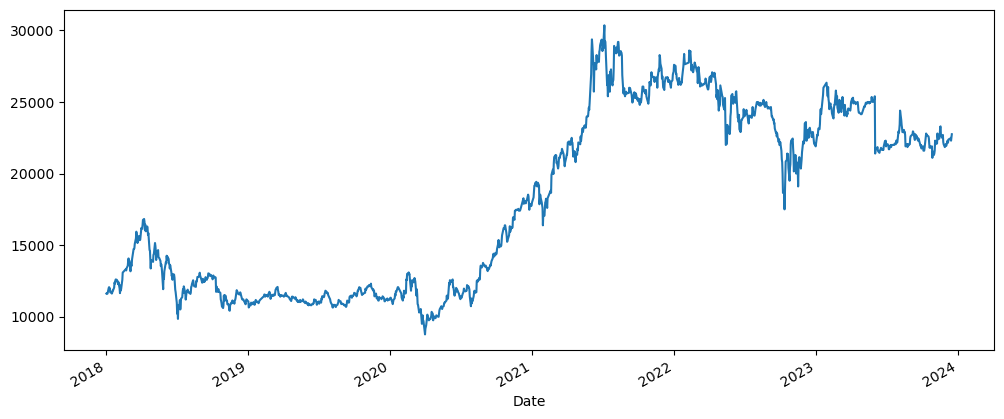

In [5]:
df['Price'].plot(figsize=(12,5))

In [6]:
# Perform Augmented Dickey-Fuller test
result = adfuller(np.diff(df['Price']))

# Extract and print the test statistics and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -23.338800397507715
p-value: 0.0


<Axes: xlabel='Date'>

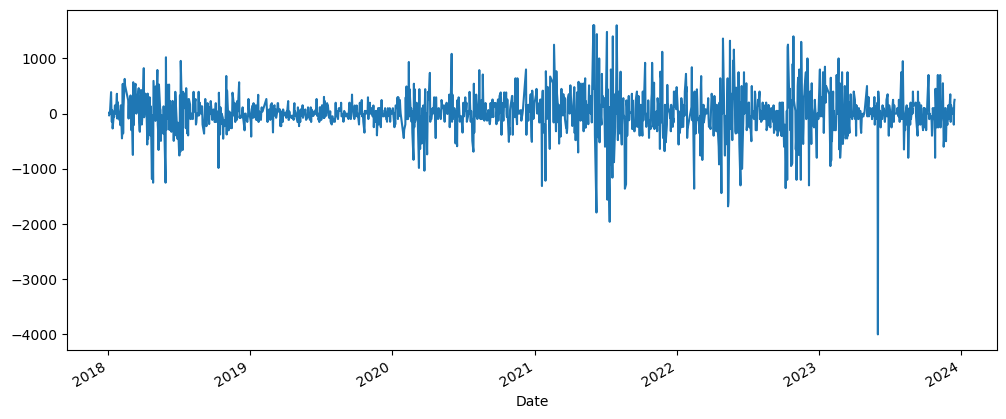

In [7]:
df['Price'].diff().plot(figsize=(12,5))

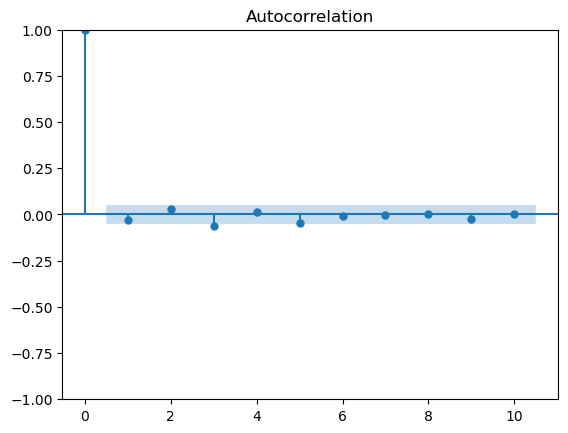

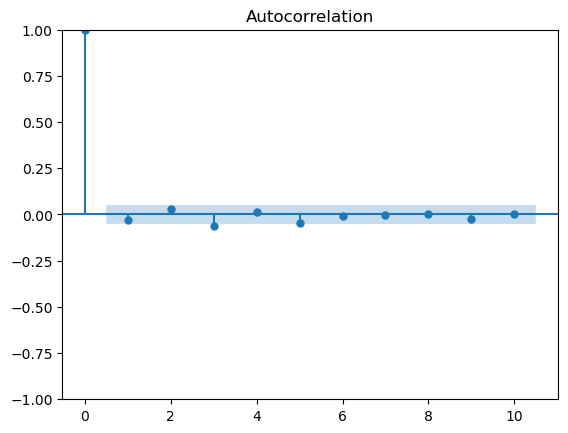

In [8]:
#ACF
sm.tsa.acf(np.diff(df['Price']), nlags=10)
sm.graphics.tsa.plot_acf(np.diff(df['Price']),lags=10)

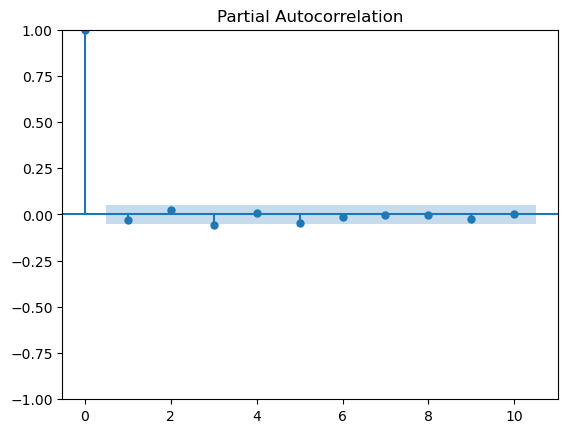

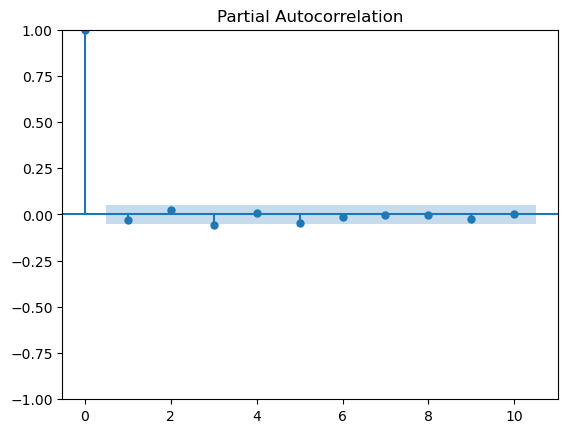

In [9]:
#PACF
sm.tsa.pacf(np.diff(df['Price']), nlags=10)
sm.graphics.tsa.plot_pacf(np.diff(df['Price']),lags=10)

In [10]:
#split training and testing (for model 7:3)
train_size1 = int(0.7 * len(df))
train1, test1 = df[:train_size1], df[train_size1:]

In [11]:
#split training and testing (for model 8:2)
train_size2 = int(0.8 * len(df))
train2, test2 = df[:train_size2], df[train_size2:]

In [12]:
#split training and testing (for model 9:1)
train_size3 = int(0.9 * len(df))
train3, test3 = df[:train_size3], df[train_size3:]

In [13]:
#using auto_arima for model Sarima 7:3
model73 = auto_arima(y = train1.Price,m=20)

In [14]:
#using auto_arima for model Sarima 8:2
model82 = auto_arima(y = train2.Price,m=20)

In [15]:
#using auto_arima for model Sarima 9:1
model91 = auto_arima(y = train3.Price,m=20)

In [16]:
#fitting 3 model
model73_fit = model73.fit(train1.Price)
model82_fit = model82.fit(train2.Price)
model91_fit = model91.fit(train3.Price)

In [17]:
#Prediction for model Sarima 7:3
predictions1 = pd.Series(model73.predict(n_periods = len(test1)))
predictions1.index = test1.index
predictions1

Date
2022-03-10    26111.253576
2022-03-11    26120.301127
2022-03-14    26115.665714
2022-03-15    26116.651659
2022-03-16    26116.205530
                  ...     
2023-12-11    26116.274651
2023-12-12    26116.274651
2023-12-13    26116.274651
2023-12-14    26116.274651
2023-12-15    26116.274651
Length: 446, dtype: float64

In [18]:
#Prediction for model Sarima 8:2
predictions2 = pd.Series(model82.predict(n_periods = len(test2)))
predictions2.index = test2.index
predictions2

Date
2022-10-12    17545.932997
2022-10-13    17494.016043
2022-10-14    17523.196131
2022-10-17    17464.784824
2022-10-18    17506.450452
                  ...     
2023-12-11    17209.393944
2023-12-12    17209.393944
2023-12-13    17209.393944
2023-12-14    17209.393944
2023-12-15    17209.393944
Length: 297, dtype: float64

In [19]:
#Prediction for model Sarima 9:1
predictions3 = pd.Series(model91.predict(n_periods = len(test3)))
predictions3.index = test3.index
predictions3

Date
2023-05-19    24984.615594
2023-05-22    24998.510232
2023-05-23    24985.961099
2023-05-24    24997.295021
2023-05-25    24987.058633
                  ...     
2023-12-11    24991.916401
2023-12-12    24991.916407
2023-12-13    24991.916402
2023-12-14    24991.916407
2023-12-15    24991.916403
Length: 149, dtype: float64

<Axes: xlabel='Date'>

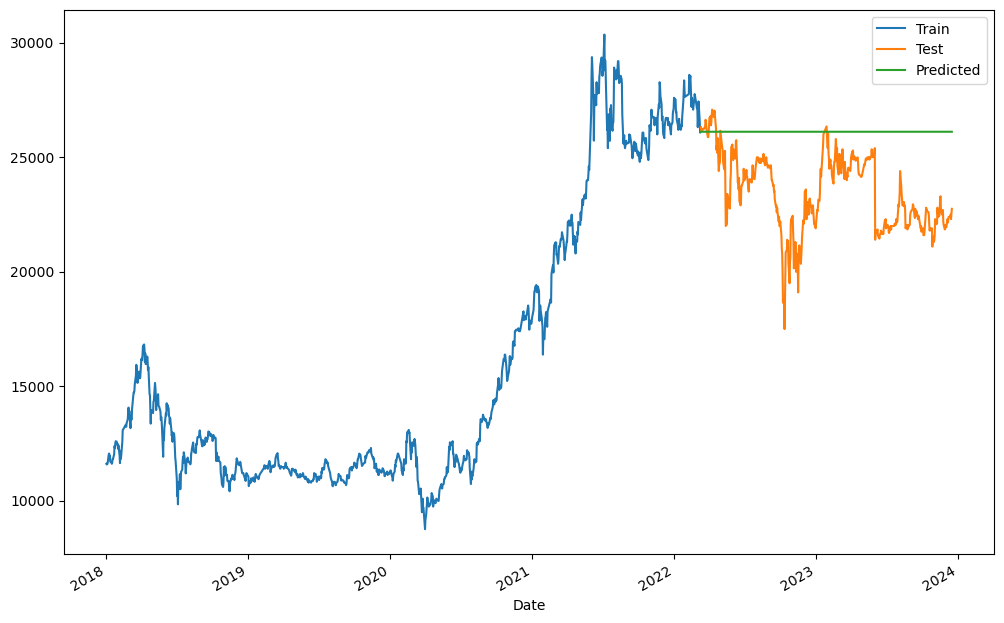

In [20]:
#Visualize train, test, predict of model 7:3
train1['Price'].plot(figsize=(12,8),legend=True,label='Train')
test1['Price'].plot(legend = True,label='Test')
predictions1.plot(legend = True,label='Predicted')

<Axes: xlabel='Date'>

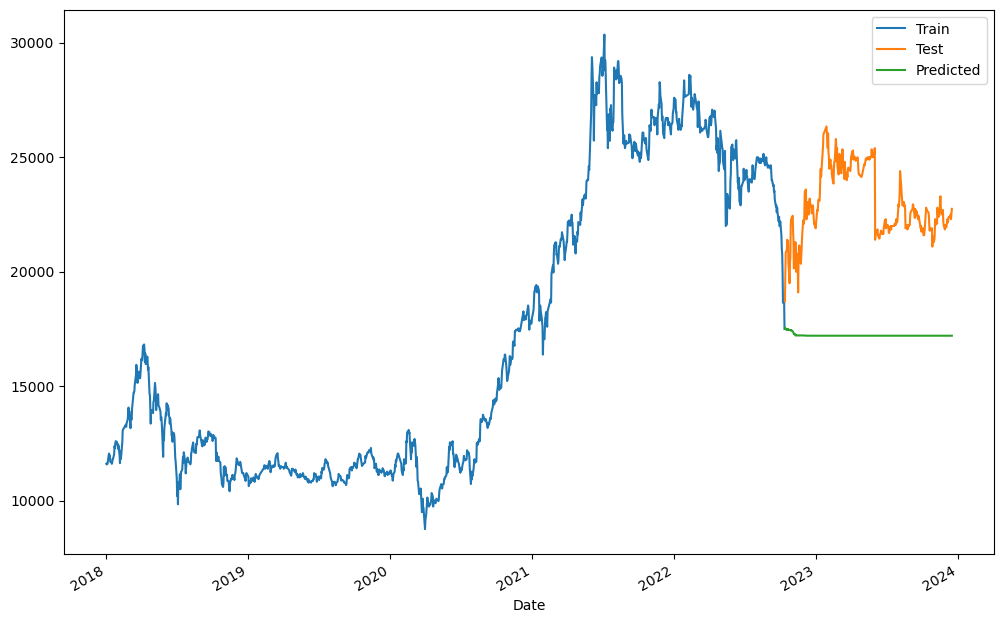

In [21]:
#Visualize train, test, predict of model 8:2
train2['Price'].plot(figsize=(12,8),legend=True,label='Train')
test2['Price'].plot(legend = True,label='Test')
predictions2.plot(legend = True,label='Predicted')

<Axes: xlabel='Date'>

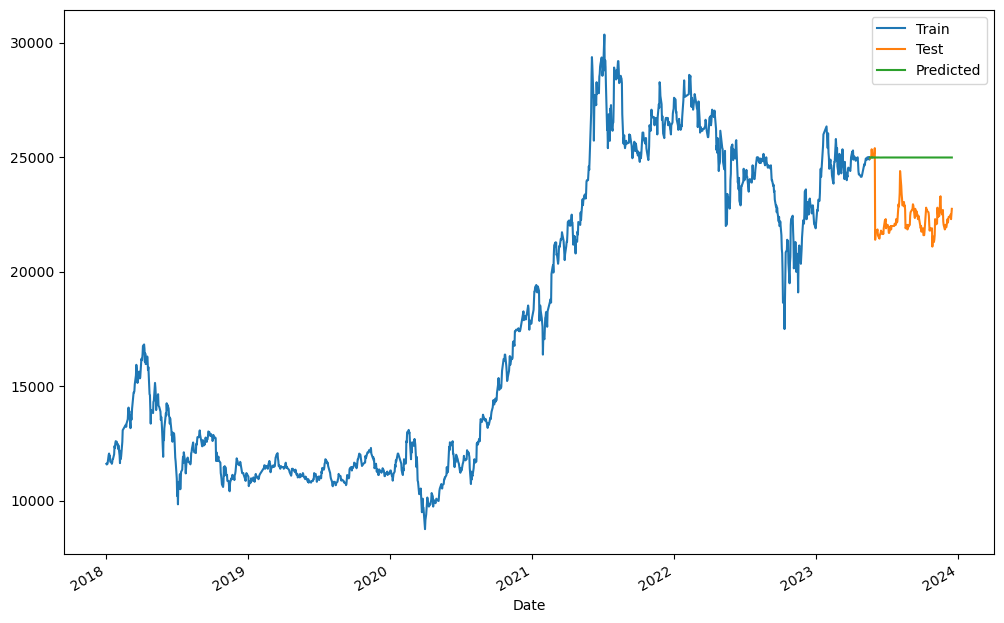

In [22]:
#Visualize train, test, predict of model 9:1
train3['Price'].plot(figsize=(12,8),legend=True,label='Train')
test3['Price'].plot(legend = True,label='Test')
predictions3.plot(legend = True,label='Predicted')

In [23]:
#Take the last data in the dataset
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[22750.]])

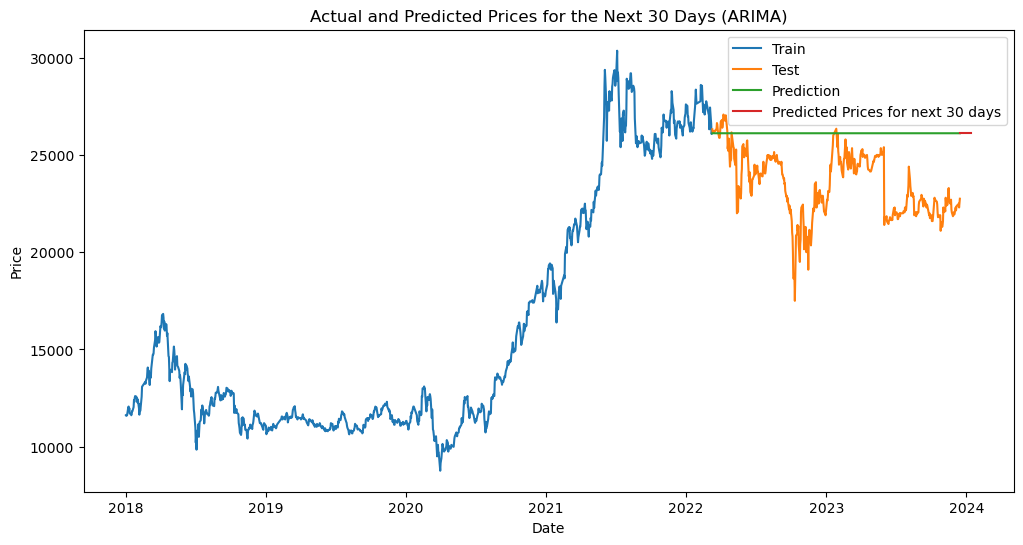

In [24]:
# Predict values for the next 30 days (model 7:3)
x_next_30_day_sarima1 = []

last_date = df.index[-1]

# Use the last known value in your dataset as the starting point
last_data = np.array(df['Price'].iloc[-1])

for i in range(30):
    # Predict using ARIMA model
    prediction = model73.predict(start=len(df), end=len(df) + i, dynamic=False)
    x_pred_next_sarima1 = prediction.values[-1]  # Access the values attribute instead of predicted_mean
    x_next_30_day_sarima1.append(x_pred_next_sarima1)

    # Update last_data for the next iteration
    last_data = np.array([x_pred_next_sarima1])

# Generate dates for the next 30 days
next_30_days1 = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

# Convert dates to a format compatible with your datetime index (if needed)
next_30_days_str1 = [date.strftime('%Y-%m-%d') for date in next_30_days1]

# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(train1.index, train1['Price'], label='Train')
plt.plot(test1.index, test1['Price'], label='Test')
plt.plot(predictions1.index, predictions1, label='Prediction')
plt.plot(next_30_days1, x_next_30_day_sarima1, label='Predicted Prices for next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual and Predicted Prices for the Next 30 Days (ARIMA)')
plt.legend()
plt.show()


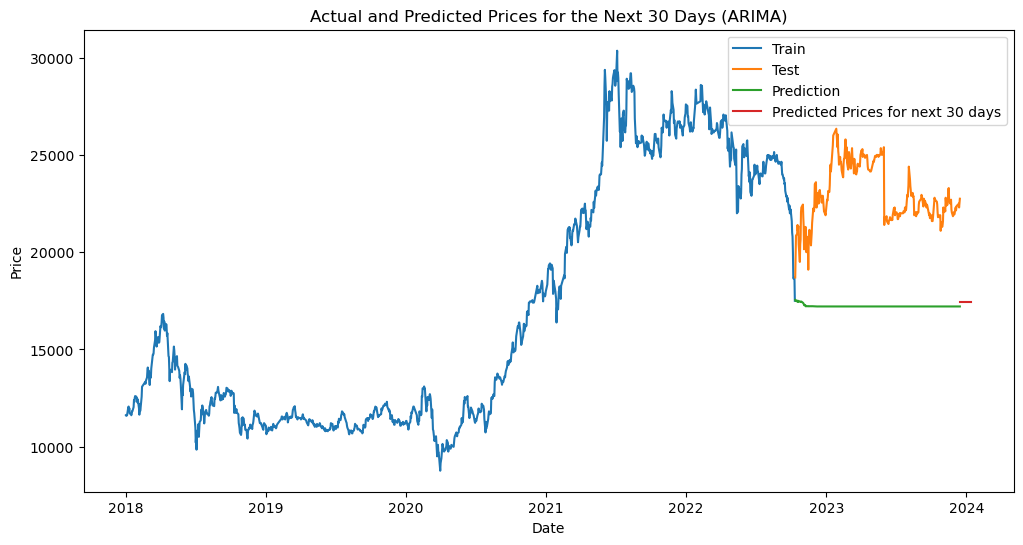

In [25]:
# Predict values for the next 30 days (model 8:2)
x_next_30_day_sarima2 = []

# Use the last known value in your dataset as the starting point
last_data = np.array(df['Price'].iloc[-1])

for i in range(30):
    # Predict using ARIMA model
    prediction2 = model82.predict(start=len(df), end=len(df) + i, dynamic=False)
    x_pred_next_sarima2 = prediction2.values[-1]  # Access the values attribute instead of predicted_mean
    x_next_30_day_sarima2.append(x_pred_next_sarima2)

    # Update last_data for the next iteration
    last_data = np.array([x_pred_next_sarima2])

# Generate dates for the next 30 days
next_30_days2 = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

# Convert dates to a format compatible with your datetime index (if needed)
next_30_days_str2 = [date.strftime('%Y-%m-%d') for date in next_30_days2]

# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(train2.index, train2['Price'], label='Train')
plt.plot(test2.index, test2['Price'], label='Test')
plt.plot(predictions2.index, predictions2, label='Prediction')
plt.plot(next_30_days2, x_next_30_day_sarima2, label='Predicted Prices for next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual and Predicted Prices for the Next 30 Days (ARIMA)')
plt.legend()
plt.show()


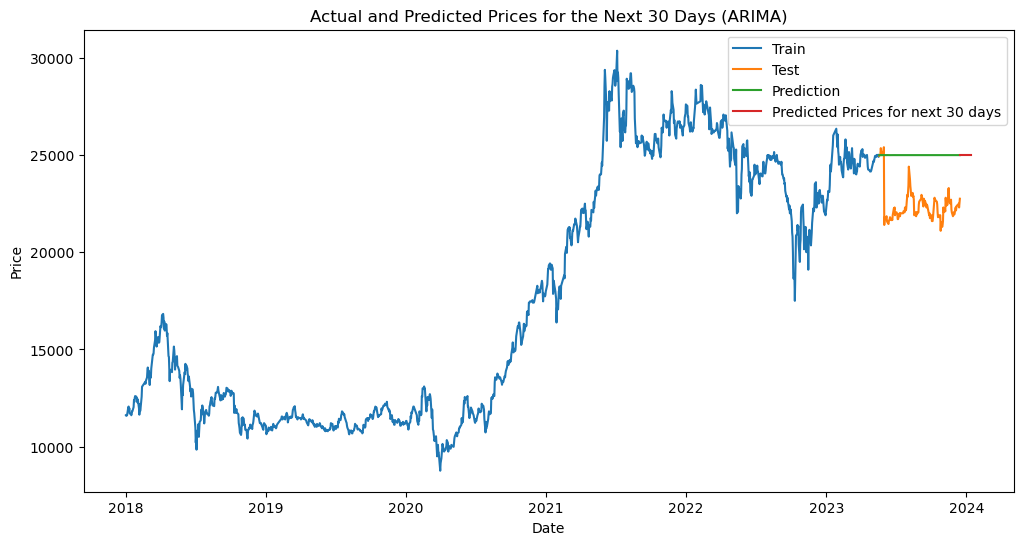

In [26]:
# Predict values for the next 30 days (model 9:1)
x_next_30_day_sarima3 = []

# Use the last known value in your dataset as the starting point
last_data = np.array(df['Price'].iloc[-1])

for i in range(30):
    # Predict using ARIMA model
    prediction3 = model91.predict(start=len(df), end=len(df) + i, dynamic=False)
    x_pred_next_sarima3 = prediction3.values[-1]  # Access the values attribute instead of predicted_mean
    x_next_30_day_sarima3.append(x_pred_next_sarima3)

    # Update last_data for the next iteration
    last_data = np.array([x_pred_next_sarima3])

# Generate dates for the next 30 days
next_30_days3 = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

# Convert dates to a format compatible with your datetime index (if needed)
next_30_days_str3 = [date.strftime('%Y-%m-%d') for date in next_30_days3]

# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(train3.index, train3['Price'], label='Train')
plt.plot(test3.index, test3['Price'], label='Test')
plt.plot(predictions3.index, predictions3, label='Prediction')
plt.plot(next_30_days3, x_next_30_day_sarima3, label='Predicted Prices for next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual and Predicted Prices for the Next 30 Days (ARIMA)')
plt.legend()
plt.show()


In [27]:
# Evaluate the accuracy (model 7:3)

sarima_mape1 = mean_absolute_percentage_error(test1.Price.values, predictions1.values) * 100
sarima_mae1 = mae(test1.Price.values, predictions1.values)
sarima_rmse1 = np.sqrt(np.mean((predictions1.values - test1.Price.values)**2))
sarima_msle1 = mean_squared_log_error(test1.Price.values, predictions1.values)

print("SARIMA MAPE:\t", sarima_mape1)
print("SARIMA MSLE:\t", sarima_msle1)
print("SARIMA MAE: \t",  sarima_mae1)
print("SARIMA RMSE:\t", sarima_rmse1)

SARIMA MAPE:	 12.249886986023373
SARIMA MSLE:	 0.01758281390651804
SARIMA MAE: 	 2739.4921009166196
SARIMA RMSE:	 3167.2483486072333


In [28]:
# Evaluate the accuracy (model 8:2)

sarima_mape2 = mean_absolute_percentage_error(test2.Price.values, predictions2.values) * 100
sarima_mae2 = mae(test2.Price.values, predictions2.values)
sarima_rmse2 = np.sqrt(np.mean((predictions2.values - test2.Price.values)**2))
sarima_msle2 = mean_squared_log_error(test2.Price.values, predictions2.values)

print("SARIMA MAPE:\t", sarima_mape2)
print("SARIMA MSLE:\t", sarima_msle2)
print("SARIMA MAE: \t",  sarima_mae2)
print("SARIMA RMSE:\t", sarima_rmse2)

SARIMA MAPE:	 24.554028070837607
SARIMA MSLE:	 0.08475702396762357
SARIMA MAE: 	 5699.743173635718
SARIMA RMSE:	 5888.329414391697


In [29]:
# Evaluate the accuracy (model 9:1)

sarima_mape3 = mean_absolute_percentage_error(test3.Price.values, predictions3.values) * 100
sarima_mae3 = mae(test3.Price.values, predictions3.values)
sarima_rmse3 = np.sqrt(np.mean((predictions3.values - test3.Price.values)**2))
sarima_msle3 = mean_squared_log_error(test3.Price.values, predictions3.values)

print("SARIMA MAPE:\t", sarima_mape3)
print("SARIMA MSLE:\t", sarima_msle3)
print("SARIMA MAE: \t",  sarima_mae3)
print("SARIMA RMSE:\t", sarima_rmse3)

SARIMA MAPE:	 11.773101105315055
SARIMA MSLE:	 0.013453987074411405
SARIMA MAE: 	 2605.820027583735
SARIMA RMSE:	 2724.878590180293
